# Assignement 3, Data science in practice, MGT-415, 26.04.2020
## Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [28]:
data = pd.read_excel('network_data.xlsx')
print(data.shape)
print(data.dtypes)
data.head()

(88234, 2)
NodeA    int64
NodeB    int64
dtype: object


,NodeA,NodeB
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [29]:
NETWORK = nx.Graph()
length_data = len(data)
for i in range(length_data):
    NETWORK.add_edge(data.NodeA[i],data.NodeB[i])

<function matplotlib.pyplot.show(*args, **kw)>

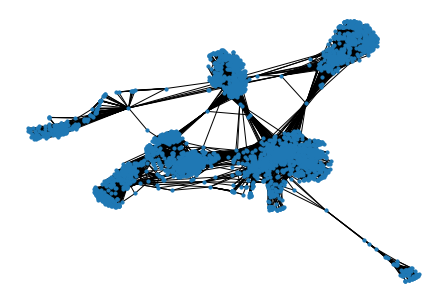

In [30]:
nx.draw(NETWORK, node_size=10)
plt.show

#draw_planar or draw_spectral or draw_circular or draw

The network with every point is represented below due to long computational time:
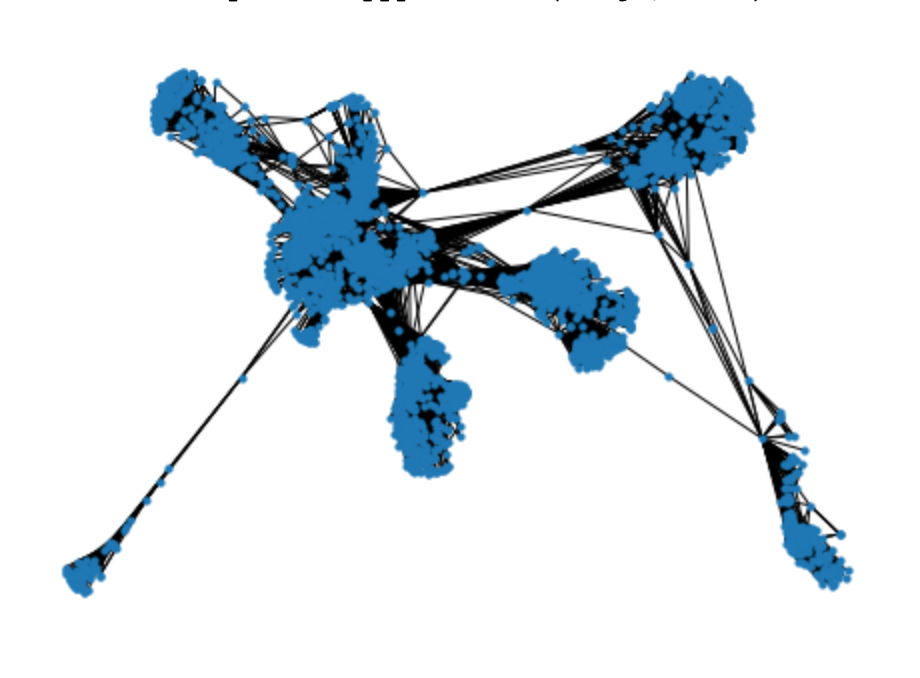

In [31]:
results1 = pd.DataFrame(NETWORK.degree(), columns = ['node','degree'])

In [32]:
degree_centrality = nx.degree_centrality(NETWORK)
results2 = pd.DataFrame(degree_centrality.items(), columns = ['node','degree_centrality'])

In [33]:
betweenness = nx.betweenness_centrality(NETWORK)
results3 = pd.DataFrame(betweenness.items(), columns = ['node','betweenness'])

In [34]:
eig_centr = nx.eigenvector_centrality(NETWORK)
results4 = pd.DataFrame(eig_centr.items(), columns = ['node','eigenvector_centrality'])

In [35]:
results = results1.join(results2.degree_centrality).join(results3.betweenness).join(results4.eigenvector_centrality)

Text(0.5, 1.0, 'Eigenvector centrality distribution')

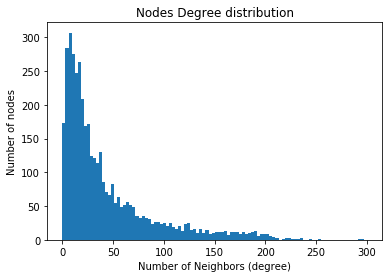

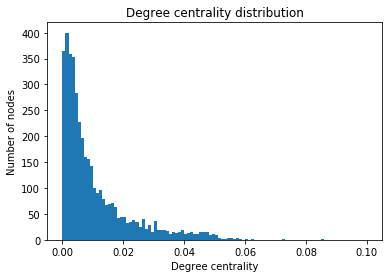

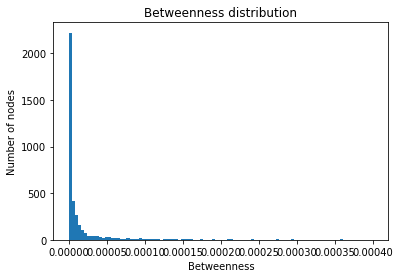

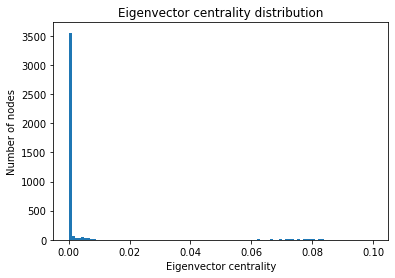

In [36]:
degree_hist = plt.hist(results.degree, 100, range = [0,300])
plt.xlabel('Number of Neighbors (degree)')
plt.ylabel('Number of nodes')
plt.title('Nodes Degree distribution')

plt.figure()
degree_hist = plt.hist(results.degree_centrality, 100, range = [0,0.1])
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality distribution')

plt.figure()
degree_hist = plt.hist(results.betweenness, 100, range = [0,0.0004])
plt.xlabel('Betweenness')
plt.ylabel('Number of nodes')
plt.title('Betweenness distribution')

plt.figure()
degree_hist = plt.hist(results.eigenvector_centrality, 100, range = [0,0.1])
plt.xlabel('Eigenvector centrality')
plt.ylabel('Number of nodes')
plt.title('Eigenvector centrality distribution')

In [37]:
density = nx.density(NETWORK)
av_path = nx.average_shortest_path_length(NETWORK)
print('The density of the network is:', density)
print("The average shortest path length of the network is:", av_path)

The density of the network is: 0.010819963503439287
The average shortest path length of the network is: 3.6925068496963913


In [38]:
eig_centr_sorted = sorted(eig_centr.items(), key=lambda x:x[1], reverse = True)
print(eig_centr_sorted[:20])
print(results.eigenvector_centrality)

[(1912, 0.09540696149067629), (2266, 0.08698327767886553), (2206, 0.08605239270584343), (2233, 0.08517340912756598), (2464, 0.08427877475676092), (2142, 0.08419311897991796), (2218, 0.08415573568055032), (2078, 0.08413617041724979), (2123, 0.08367141238206226), (1993, 0.0835324284081597), (2410, 0.08351751162148192), (2244, 0.08334186008004286), (2507, 0.08327311568144907), (2240, 0.08305685135432213), (2340, 0.08305335409204806), (2229, 0.08300773533630397), (1985, 0.08273780994613868), (2088, 0.08246949872654785), (2073, 0.08225574464925646), (2220, 0.08215589813547934)]
0       3.391796e-05
1       6.045346e-07
2       2.233461e-07
3       6.635648e-07
4       2.236416e-07
            ...     
4034    2.951270e-10
4035    2.912901e-10
4036    2.931223e-10
4037    2.989233e-10
4038    8.915175e-10
Name: eigenvector_centrality, Length: 4039, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

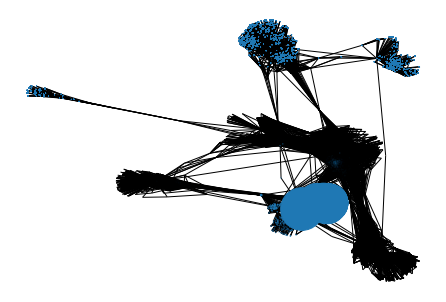

In [39]:
nx.draw(NETWORK, node_size = (results.eigenvector_centrality)*results.eigenvector_centrality*200000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

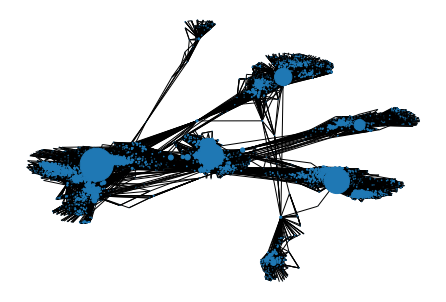

In [48]:
nx.draw(NETWORK, node_size = (results.degree)*results.degree/1000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

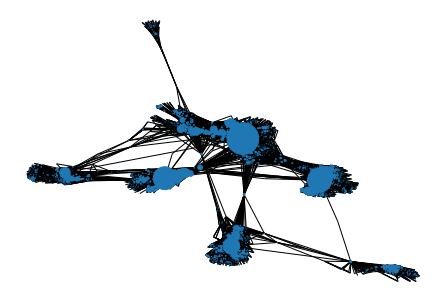

In [51]:
nx.draw(NETWORK, node_size = (results.degree_centrality)*results.degree_centrality*15000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

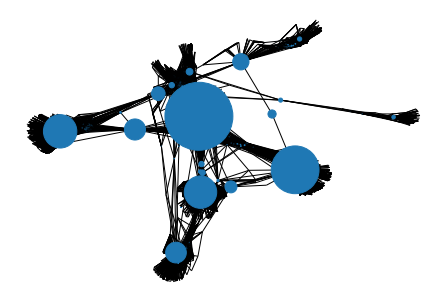

In [46]:
nx.draw(NETWORK, node_size = (results.betweenness)*results.betweenness*20000)
plt.show

In [47]:
#within a cluster, how many nodes to reachable in N steps, edge/edge possible